In [1]:
from model.model_initialization import * 
initialize_model(1000, 10, 0.01, 0.02)

{'cfmm_type': '',
 'initial_values': {'token_list': ['R1', 'R2'],
  'R': [1000, 1500000],
  'P': [2, 0.6666666666666666],
  'fee_assets': 0.01,
  'fee_HDX': 0.02},
 'agent_d': {'Trader': {'HDX': 1000000, 'R1': 1000000, 'R2': 1000000},
  'LP1': {'omniR1': 10}},
 'action_ls': [('trade', 1000)],
 'prob_dict': {'trade': {'sell_r2_for_r1': 0.5, 'sell_r1_for_r2': 0.5}},
 'action_dict': {'sell_r2_for_r1': {'token_buy': 'R1',
   'token_sell': 'R2',
   'amount_sell': 10,
   'action_id': 'Trade',
   'agent_id': 'Trader'},
  'sell_r1_for_r2': {'token_sell': 'R1',
   'token_buy': 'R2',
   'amount_sell': 10,
   'action_id': 'Trade',
   'agent_id': 'Trader'}}}

In [2]:
import pandas as pd

from IPython.core.debugger import Pdb
ipdb = Pdb()

from model import init_utils
from model import processing
# Experiments
from model import run
from model.plot_utils import *
from model.model_initialization import * 

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# set variables & parameters

fee_level_assets = (0.00, 0.01, 0.02, 0.03, 0.04)
fee_level_hdx = 0.00
# uniform_data = np.random.rand(10, 12)
#trade_volume = {'10': 0.5, '20': 0.6}
#liquidity = {'1000': 0.5, '2000': 0.6}
#trade_volume = (50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)
#liquidity = (100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000)
trade_volume = (100, 110, 120, 130)
liquidity = (100000)

#create matrix for comparison
m=len(trade_volume)
n=len(fee_level_assets)
matrix = np.ndarray(shape = (m,n), dtype = int)

# index matrix
#better_index = ["X1", "X2", "Y1", "Y2", "Y3"]
#matrix.index = better_index
sim_nr = 0

for i in range(len(fee_level_assets)):
    for j in range(len(trade_volume)):
        # initialize model with starting conditions
        config_params = initialize_model(liquidity, trade_volume[j], fee_level_assets[i], fee_level_hdx)
        
        #run model
        config_dict, state = init_utils.get_configuration(config_params)

        pd.options.mode.chained_assignment = None  # default='warn'
        pd.options.display.float_format = '{:.2f}'.format
        
        run.config(config_dict, state)
        events = run.run()
        
        rdf, agent_df = processing.postprocessing(events)
        
        # calculate profitability metric; change in pool values
        
        #if (i == 0) & (j == 0):
        #    sim_nr = 0
        #elif (i == 0) & (j == 1):
        #    sim_nr = 1
        #elif (i == 1) & (j == 0):
        #    sim_nr = 2
        #elif (i == 1) & (j == 1):
        #    sim_nr = 3
        #    
        
        
        print(sim_nr)
        total_timesteps = 1000
        
        profit_results = pd.merge(agent_df, rdf, how="inner", on=["timestep", "simulation", "run", "subset", "substep"])
        profit_results['val_pool'] = profit_results.apply(lambda x: processing.val_pool(x), axis=1)
        
        profit_results1 = profit_results[profit_results['simulation'] == sim_nr]
        profit_results2 = profit_results1[profit_results1['timestep'] == total_timesteps]
        profit_sim0 = profit_results2['val_pool'].iloc[0]
        
        ## Comment out old code
        ##for first asset: R-0
        #rdf1 = rdf[rdf["simulation"] == sim_nr]
        #rdf2 = rdf1[rdf1["timestep"] == 1000]
        #r0_1 = rdf2['R-0'].iloc[0]
        #
        #rdf1 = rdf[rdf["simulation"] == sim_nr]
        #rdf2 = rdf1[rdf1["timestep"] == 1]
        #r0_0 = rdf2['R-0'].iloc[0]
        #
        #profit_sim0_r0 = r0_1 - r0_0
        #
        ##for second asset: R-1
        #rdf1 = rdf[rdf["simulation"] == sim_nr]
        #rdf2 = rdf1[rdf1["timestep"] == 1000]
        #r1_1 = rdf2['R-1'].iloc[0]
        #
        #rdf1 = rdf[rdf["simulation"] == sim_nr]
        #rdf2 = rdf1[rdf1["timestep"] == 1]
        #r1_0 = rdf2['R-1'].iloc[0]
        #
        #profit_sim0_r1 = r1_1 - r1_0
        #
        ##total profit
        #
        #profit_sim0 = profit_sim0_r1 + profit_sim0_r0
        #
        

        
        # fill in matrix with calculation results at specific place
        #matrix[j][i] = np.random.randint(1, 100 + 1)
        #matrix[j][i] = trade_volume[i]*liquidity[j]
        matrix[j][i] = profit_sim0
        sim_nr += 1





#print(agent_df.tail(20))




                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.57s
0

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 2
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0, 1]
SubsetIDs: [0, 0]
Ns       : [0, 0]
ExpIDs   : [0, 0]
Execution Mode: parallelized
Total execution time: 1.14s

Total execution time: 9.18s
14

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 16
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
SubsetIDs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ns       : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ExpIDs   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Execution Mode: parallelized
Total execution time: 9.41s
15

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 17
Dimensions of the first simulatio

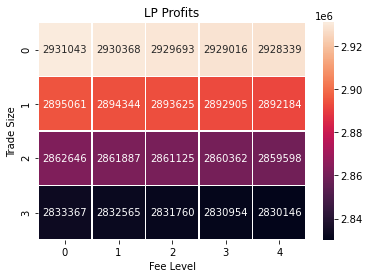

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix, linewidth=0.5, annot=True, fmt="d")
ax.set_title("LP Profits")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

## Merge Results

In [4]:
        profit_results = pd.merge(agent_df, rdf, how="inner", on=["timestep", "simulation", "run", "subset", "substep"])
        profit_results['val_pool'] = profit_results.apply(lambda x: processing.val_pool(x), axis=1)
        profit_sim0 = profit_results.apply(lambda x: processing.val_pool(x), axis=1)

In [5]:
profit_results

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,r-0,...,B-1,D,T,H,token_list-0,token_list-1,fee_assets,fee_HDX,n,val_pool
0,0,0,1,3,1,Trader,1000000.00,0,0,999900.00,...,1500000,0.00,None,None,R1,R2,0.00,0.00,2,3662939.33
1,0,0,1,3,1,LP1,0.00,100,0,0.00,...,1500000,0.00,None,None,R1,R2,0.00,0.00,2,199.60
2,0,0,1,3,2,Trader,1000000.00,0,0,999933.40,...,1500000,0.00,None,None,R1,R2,0.00,0.00,2,3664182.93
3,0,0,1,3,2,LP1,0.00,100,0,0.00,...,1500000,0.00,None,None,R1,R2,0.00,0.00,2,199.73
4,0,0,1,3,3,Trader,1000000.00,0,0,999966.77,...,1500000,0.00,None,None,R1,R2,0.00,0.00,2,3665426.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,19,0,1,3,998,LP1,0.00,130,0,0.00,...,1500000,0.00,None,None,R1,R2,0.04,0.00,2,135.85
39996,19,0,1,3,999,Trader,1000000.00,0,0,962564.66,...,1500000,0.00,None,None,R1,R2,0.04,0.00,2,2831907.87
39997,19,0,1,3,999,LP1,0.00,130,0,0.00,...,1500000,0.00,None,None,R1,R2,0.04,0.00,2,135.56
39998,19,0,1,3,1000,Trader,1000000.00,0,0,962434.66,...,1500000,0.00,None,None,R1,R2,0.04,0.00,2,2830146.68


In [6]:
profit_results1 = profit_results[profit_results['simulation'] == sim_nr]
profit_results2 = profit_results1[profit_results1['timestep'] == total_timesteps]
profit_results2['val_pool'].iloc[0]

IndexError: single positional indexer is out-of-bounds

In [ ]:
print(profit_results.columns)

In [ ]:
profit_sim0


var_list = ['R', 'Q', 'A', 'D']
plot_vars(rdf, var_list)

## Fee Analysis

In [ ]:
rdf

In [ ]:
print(rdf.columns)

In [ ]:
print(rdf.keys)

In [ ]:
agent_df

In [ ]:
agent_df.query('agent_label=="LP1"')

## How to metric

In [ ]:
rdf.loc[(rdf['simulation'] == 0) & (rdf['timestep'] == 1000)]['R-1']

In [ ]:
#import pandas as pd
#rdf.get_value('simulation' == 0 )]
rdf1 = rdf[rdf["simulation"] == 0]
rdf2 = rdf1[rdf1["timestep"] == 1000]
x_0 = rdf2['R-0'].iloc[0]
x_0


In [ ]:
rdf.loc[(rdf['simulation'] == 1) & (rdf['timestep'] == 1000)]['R-1']

In [ ]:
rdf.loc[(rdf['simulation'] == 2) & (rdf['timestep'] == 1000)]['R-1']

In [ ]:
rdf.loc[(rdf['simulation'] == 3) & (rdf['timestep'] == 1000)]['R-1']

In [ ]:
rdf.loc[(rdf['simulation'] == 0) & (rdf['timestep'] == 1)]['R-1']

In [ ]:
rdf.loc[(rdf['simulation'] == 1) & (rdf['timestep'] == 1)]['R-1']

In [ ]:
rdf.loc[(rdf['simulation'] == 2) & (rdf['timestep'] == 1)]['R-1']

In [ ]:
rdf.loc[(rdf['simulation'] == 3) & (rdf['timestep'] == 1)]['R-1']

### Calculate change in pool value

#### R-0

In [ ]:
rdf1 = rdf[rdf["simulation"] == 0]
rdf2 = rdf1[rdf1["timestep"] == 1000]
r0_1 = rdf2['R-0'].iloc[0]
r0_1

In [ ]:
rdf1 = rdf[rdf["simulation"] == 0]
rdf2 = rdf1[rdf1["timestep"] == 1]
r0_0 = rdf2['R-0'].iloc[0]
r0_0

In [ ]:
profit_sim0_r0 = r0_1 - r0_0
profit_sim0_r0

#### R-1

In [ ]:
rdf1 = rdf[rdf["simulation"] == 0]
rdf2 = rdf1[rdf1["timestep"] == 1000]
r1_1 = rdf2['R-1'].iloc[0]
r1_1

In [ ]:
rdf1 = rdf[rdf["simulation"] == 0]
rdf2 = rdf1[rdf1["timestep"] == 1]
r1_0 = rdf2['R-1'].iloc[0]
r1_0

In [ ]:
profit_sim0_r1 = r1_1 - r1_0
profit_sim0_r1

#### Total pool value

In [ ]:
profit_sim0_r1 + profit_sim0_r0

## How to heatmap

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# set variables & parameters

fee_level = 0.03
# uniform_data = np.random.rand(10, 12)
#trade_volume = {'10': 0.5, '20': 0.6}
#liquidity = {'1000': 0.5, '2000': 0.6}
trade_volume = (50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)
liquidity = (100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000)

#create matrix for comparison
m=len(trade_volume)
n=len(liquidity)
matrix = np.ndarray(shape = (m,n), dtype = int)

# index matrix
#better_index = ["X1", "X2", "Y1", "Y2", "Y3"]
#matrix.index = better_index

# fill in matrix with calculation results
for i in range(len(liquidity)):
    for j in range(len(trade_volume)):
        matrix[j][i] = np.random.randint(1, 100 + 1)




#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix, linewidth=0.5, annot=True, fmt="d")
ax.set_title("LP Profits")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Liquidity')
ax.set_ylabel('Trade Volume')
plt.show()

In [ ]:
matrix

In [ ]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,  cmap="YlGnBu")
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()


test_array = np.arange(100 * 100).reshape(100, 100)
heatmap2d(test_array)

In [ ]:
trade_volume